# 2. Proofs Without Figures

In [1]:
import matplotlib.pyplot as plt

from sympy import (
    Circle,
    FiniteSet,
    Intersection,
    Line,
    pi,
    Point,
    Ray,
    Segment,
    simplify,
    Symbol,
    SymmetricDifference
)
from sympy.logic.boolalg import (
    And,
    Implies
)

The following code shows the proof of a perpendicular bisector of a segment AB:

In [2]:
w,x,y,z = map(Symbol, "wxyz")

A = Point(w, x)
B = Point(y, z)

AB = Segment(A, B)
AB.length

sqrt((w - y)**2 + (x - z)**2)

In [3]:
A_circ = Circle(A, AB.length)
print(A_circ)

Circle(Point2D(w, x), sqrt((w - y)**2 + (x - z)**2))


In [4]:
B_circ = Circle(B, AB.length)
print(B_circ)

Circle(Point2D(y, z), sqrt((w - y)**2 + (x - z)**2))


In [5]:
intersect_points = A_circ.intersect(B_circ)
intersect_points

FiniteSet(Point2D(-(w**2 + x**2 - y**2 - z**2 + (-2*x + 2*z)*(x/2 + z/2 - sqrt(3)*(-w + y)/2))/(2*(-w + y)), x/2 + z/2 - sqrt(3)*(-w + y)/2), Point2D(-(w**2 + x**2 - y**2 - z**2 + (-2*x + 2*z)*(x/2 + z/2 + sqrt(3)*(-w + y)/2))/(2*(-w + y)), x/2 + z/2 + sqrt(3)*(-w + y)/2))

In [6]:
intersect_line = Line(intersect_points.args[0], intersect_points.args[1])
intersect_line

Line2D(Point2D(-(w**2 + x**2 - y**2 - z**2 + (-2*x + 2*z)*(x/2 + z/2 - sqrt(3)*(-w + y)/2))/(2*(-w + y)), x/2 + z/2 - sqrt(3)*(-w + y)/2), Point2D(-(w**2 + x**2 - y**2 - z**2 + (-2*x + 2*z)*(x/2 + z/2 + sqrt(3)*(-w + y)/2))/(2*(-w + y)), x/2 + z/2 + sqrt(3)*(-w + y)/2))

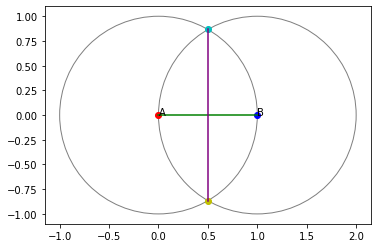

In [7]:
fig, ax = plt.subplots()

subs_A = A.subs([(w, 0), (x, 0)])
subs_B = B.subs([(y, 1), (z, 0)])

subs_AB = Segment(subs_A, subs_B)

circ_A = plt.Circle(subs_A, subs_AB.length, facecolor = "None", edgecolor = "grey")
circ_B = plt.Circle(subs_B, subs_AB.length, facecolor = "None", edgecolor = "grey")

sect = Circle(subs_A, subs_AB.length).intersect(Circle(subs_B, subs_AB.length))
sect_1 = sect.args[0]
sect_2 = sect.args[1]

sect_line = Line(sect_1, sect_2)

plt.plot(*subs_A, "ro")
plt.annotate("A", subs_A)
plt.plot(*subs_B, "bo")
plt.annotate("B", subs_B)
plt.plot(*sect_1, "yo")
plt.plot(*sect_2, "co")
plt.plot([a.x for a in subs_AB.points], [a.y for a in subs_AB.points], color = "g")
plt.plot([a.x for a in sect_line.points], [a.y for a in sect_line.points], color = "purple")

ax.add_patch(circ_A)
ax.add_patch(circ_B)
ax.set_aspect("equal")

plt.show()

## Group 1 (Incidence Axioms)

In [8]:
u,v,w,x,y,z = map(Symbol, "uvwxyz")

P = Point(w, x)
Q = Point(y, z)
R = Point(u, v)

l = Line(P, Q)
l

Line2D(Point2D(w, x), Point2D(y, z))

In [9]:
l.points

(Point2D(w, x), Point2D(y, z))

In [10]:
l.contains(P)

True

In [11]:
l.contains(Q)

True

In [12]:
l.equals(P) | l.equals(Q)

False

In [13]:
try:
    Line(P)
except ValueError as e:
    print(e)

A 2nd Point or keyword "slope" must be used.


In [14]:
l.contains(R)

False

## Group 2 (Axioms of Order)

In [15]:
A = Point(u, v)
B = Point(w, x)
C = Point(y, z)

AC = Segment(A, C)
CA = Segment(C, A)

Implies(AC.contains(B), CA.contains(B))

True

In [16]:
from sympy.logic.boolalg import Not

l = Line(A, B)
l_seg = Segment(A, B)

C_arb = l.arbitrary_point(parameter = ".5")
D_arb = l.arbitrary_point(parameter = "1.5")

Implies(
    l.contains(A) & l.contains(B) & Not(A.equals(B)),
    l.contains(C_arb) & l.contains(D_arb)
)

True

In [17]:
l = Line(A, B)
C = l.random_point()

seg_AB = Segment(A, B).length
seg_AC = Segment(A, C).length
seg_BC = Segment(B, C).length

Implies(
    l.contains(A) & l.contains(B) & l.contains(C),
    (simplify((seg_AB + seg_BC) - seg_AC) == 0) |
    (simplify((seg_AB + seg_AC) - seg_BC) == 0) |
    (simplify((seg_AC + seg_BC) - seg_AB) == 0)
)

True

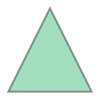

In [18]:
from sympy import symbols
from sympy import Triangle

k, m, n, p = symbols("k, m, n, p")

A = Point(u, v).subs([(u, 0), (v, 0)])
B = Point(w, x).subs([(w, 1), (x, 0)])
C = Point(y, z).subs([(y, .5), (z, 1)])

tri = Triangle(A, B, C)
tri

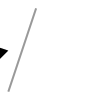

In [19]:
l = Line(Point(k, m).subs([(k, .5), (m, -.5)]), Point(n, p).subs([(n, 1), (p, 1)]))
l

In [20]:
Implies(
    bool(l.intersect(tri.sides[0])) & Not(l.contains(C)),
    bool(l.intersect(tri.sides[1])) | bool(l.intersect(tri.sides[2]))
)

True

## Group 3 (Congruence)

In [21]:
Ap, Bp, Cp = symbols("A`, B`, C`")

A = Point(0, 0)
B = Point(0, 1)
AB = Segment(A, B)

Ap = Point(1, 0)
Bp = Point(1, 1)
r = Ray(Ap, Bp)

AB.length < r.length

True

In [22]:
ApBp = Segment(Ap, Bp)

simplify(AB.length - ApBp.length) == 0

True

In [23]:
C = Point(0, 2)
Cp = Point(1, 2)

BC = Segment(B, C)
BpCp = Segment(Bp, Cp)

simplify(BC.length - BpCp.length) == 0

True

In [24]:
AC = Segment(A, C)
ApCp = Segment(Ap, Cp)

Implies(
    (simplify(AB.length - ApBp.length) == 0) & (simplify(BC.length - BpCp.length) == 0),
    simplify(AC.length - ApCp.length) == 0
)

True

In [25]:
r = Ray(A, B)
s = Ray(A, Bp)

rs = r.angle_between(s)
rs

pi/4

In [26]:
rp = Ray(Ap, Bp)
sp = Ray(Ap, B)

rpsp = rp.angle_between(sp)
rpsp

pi/4

In [27]:
simplify(rs - rpsp) == 0

True

In [28]:
A_ang = Ray(A, B).angle_between(Ray(A, C))
Ap_ang = Ray(Ap, Bp).angle_between(Ray(Ap, Cp))

B_ang = Ray(B, A).angle_between(Ray(B, C))
Bp_ang = Ray(Bp, Ap).angle_between(Ray(Bp, Cp))

C_ang = Ray(C, A).angle_between(Ray(C, B))
Cp_ang = Ray(Cp, Ap).angle_between(Ray(Cp, Bp))

Implies(
    And(
        simplify(AB.length - ApBp.length) == 0,
        simplify(BC.length - BpCp.length) == 0,
        simplify(B_ang - Bp_ang) == 0
    ),
    And(
        simplify(A_ang - Ap_ang) == 0,
        simplify(C_ang - Cp_ang) == 0
    )
)

True

## Group 4: The Parallel Axiom

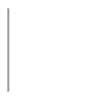

In [29]:
m = Line(Bp, Cp)
m

In [30]:
m.contains(A)

False

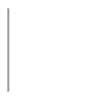

In [31]:
parallels = m.parallel_line(A)
parallels

In [32]:
parallels.length

oo

In [33]:
parallels.is_parallel(m)

True

In [34]:
m.angle_between(parallels)


0

In [35]:
Line.are_concurrent(m, parallels)

False

In [36]:
m.intersection(parallels)

[]

## Group 5: Continuity Axioms

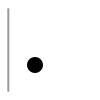

In [37]:
A = Point(0, 0)
B = Point(0, 1)
A_ray = Ray(A, B)
A_ray

In [38]:
AB = Segment(A, B)
A_ray.contains(AB)

True

In [39]:
def ray_contains_segment(ray, point, n):
    """ n is the number of points B. """
    if n >= 1:
        first_dim = point.args[0]
        B = Point(first_dim, n)
        return ray.contains(Segment(point, B))

results = []
for n in range(1, 10):
    results.append(ray_contains_segment(A_ray, A, n))
    
all(results)

True

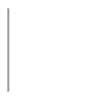

In [40]:
l = Line(Point(0, 0), Point(0, 1))
l

In [41]:
point_0 = l.arbitrary_point()
point_0

Point2D(0, t)

In [42]:
r1 = Ray(point_0, angle=0)
r1

In [43]:
r2 = Ray(point_0, angle=pi)
r2

In [44]:
c = FiniteSet(SymmetricDifference(r1, r2))
c

FiniteSet(Union(Complement(Ray2D(Point2D(0, t), Point2D(-1, t)), Ray2D(Point2D(0, t), Point2D(1, t))), Complement(Ray2D(Point2D(0, t), Point2D(1, t)), Ray2D(Point2D(0, t), Point2D(-1, t)))))

In [45]:
i = Intersection(r1, r2)
i.args

(Point2D(0, t),)

In [46]:
c.contains(i.args)

False